<a href="https://colab.research.google.com/github/sathishrouthu/DEEP-LEARNING/blob/main/Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow import keras
import numpy as np
import cv2

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 17s 1us/step


**(1) Convolutional Layer:** This layer extracts high-level input features from input data and passes those features to the next layer in the form of feature maps.

**(2) Pooling Layer:** It is used to reduce the dimensions of data by applying pooling on the feature map to generate new feature maps with reduced dimensions. PL takes either maximum or average in the old feature map within a given stride.

**(3) Fully-Connected Layer:** Finally, the task of classification is done by the FC layer. Probability scores are calculated for each class label by a popular activation function called the softmax function.

### First 10 samples of data

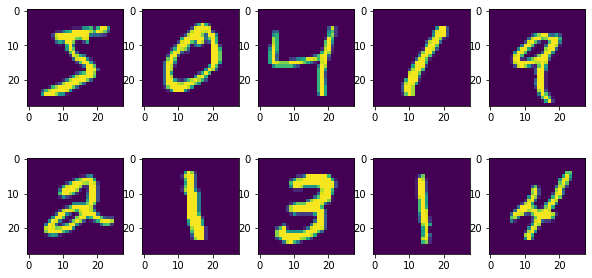

In [9]:
import matplotlib.pyplot as plt
plt.subplots(2,5,figsize=(10,5))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(X_train[i])
plt.show()

In [4]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

### SCALE THE DATA

In [5]:
X_train = X_train / 255
X_test = X_test / 255

In [6]:
X_train = X_train.reshape(-1,28,28,1)    #training set
X_test = X_test.reshape(-1,28,28,1)      #test set

In [7]:
X_train.shape

(60000, 28, 28, 1)

## CNN MODEL

In [10]:
CNN = models.Sequential([
    layers.Conv2D(filters=25, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)), 
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [11]:
CNN.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
CNN.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2151 - accuracy: 0.9334
Epoch 2/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0762 - accuracy: 0.9766
Epoch 3/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0556 - accuracy: 0.9828
Epoch 4/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0440 - accuracy: 0.9862
Epoch 5/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0343 - accuracy: 0.9894
Epoch 6/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0279 - accuracy: 0.9911
Epoch 7/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0240 - accuracy: 0.9923
Epoch 8/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0197 - accuracy: 0.9936
Epoch 9/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0160 - accuracy: 0.9945
Epoch 10/10
1875/1875 [==============================] - 26s 14m

In the CNN model created above, there is an input layer followed by two hidden layers and finally an output layer. In the most simpler terms, activation functions are responsible for making decisions of whether or not to move forward. In a deep neural network like CNN, there are many neurons, and based on activation functions, neurons fire up and the network moves forward. If you do not understand much about activation functions use ‘relu’ as it is used most popularly.

Once the model has been created, it is time to compile it and fit the model. During the process of fitting, the model will go through the dataset and understand the relations. It will learn throughout the process as many times as has been defined. In our example, we have defined 10 epochs. During the process, the CNN model will learn and also make mistakes. For every mistake (i.e., wrong predictions) the model makes, there is a penalty and that is represented in the loss value for each epoch (see GIF below). In short, the model should generate as little loss and as high accuracy as possible at the end of the last epoch.

## Evaluation 

In [12]:
CNN.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0502 - accuracy: 0.9875


[0.05019732192158699, 0.987500011920929]

In [13]:
y_predicted_by_model = CNN.predict(X_test)

y_predicted_by_model[0]   #getting probability score for each class digits

array([1.09269367e-08, 1.35410225e-08, 7.42334760e-06, 2.19076384e-08,
       1.30395417e-09, 6.15273887e-10, 4.81552842e-16, 9.99992609e-01,
       3.12694232e-10, 2.28718982e-08], dtype=float32)

In [14]:
np.argmax(y_predicted_by_model[0])

7

In [15]:
y_predicted_labels = [np.argmax(i) for i in y_predicted_by_model]

In [16]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

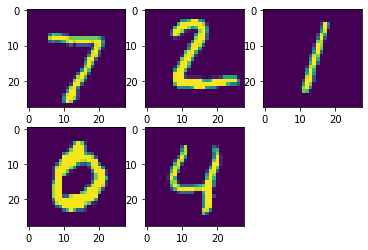

In [17]:
for i in range(5):
    plt.subplot(2,3,i+1)
    plt.imshow(X_test[i])
plt.show()